1 .Create Subset Data of 300 each for train and validation

In [9]:
from data import subset_copy
# --- Base input paths
base_img_folder = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\data_bdd\bdd100k_images_100k\bdd100k\images\100k"
base_json_folder = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\data_bdd\bdd100k_labels_release\bdd100k\labels"

# --- Base output path
base_output_folder = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data"

class_to_id = {
    "person": 0,
    "bike": 1,
    "car": 2,
    "motor": 3,
    "bus": 4,
    "train": 5,
    "truck": 6,
    "traffic light": 7,
    "traffic sign": 8,
}

subset_copy.process_split(base_img_folder=base_img_folder, base_json_folder=base_json_folder, 
                          base_output_folder=base_output_folder, split="train", 
                          class_to_id=class_to_id, num_samples=300)
subset_copy.process_split(base_img_folder=base_img_folder, base_json_folder=base_json_folder, 
                          base_output_folder=base_output_folder, split="val", 
                          class_to_id=class_to_id, num_samples=300)



🔹 Processing split: train
✅ Done! Copied 300 train images and generated YOLO labels.

🔹 Processing split: val
✅ Done! Copied 300 val images and generated YOLO labels.


2. Train a custom model (Not trained fully, just for demo)

In [5]:
# Author: Abhinav Narayan Gadge
# Email: abhigadge12@gmail.com

import os
from ultralytics import YOLO, RTDETR

# ------------------ Config ------------------ #
# Choose model: "yolov8n.pt", "yolov8m.pt", "yolo11m.pt", "rtdetr-l.pt"
MODEL = "yolov8n.pt"

# Dataset config (YAML file)
DATA_YAML = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data\data.yaml"

# Training save directory
PROJECT_DIR = "trainingPath"

# Training hyperparameters
EPOCHS = 10
PATIENCE = 3
SAVE_PERIOD = 10
LR0 = 0.001
# -------------------------------------------- #

# Initialize model
if "rtdetr" in MODEL.lower():
    model = RTDETR(MODEL)
    batch_size = 64  # RT-DETR requires smaller batch size
else:
    model = YOLO(MODEL)
    batch_size = 2   # YOLO can handle larger batch size

# Train model
results = model.train(
    data=DATA_YAML,
    epochs=EPOCHS,
    batch=batch_size,
    project=PROJECT_DIR,
    name=f"BDD_{MODEL.replace('.pt', '')}",
    exist_ok=False,
    device="cpu",       # Change to "cuda" for GPU
    resume=False,
    plots=True,
    patience=PATIENCE,
    degrees=360,
    scale=0.6,
    translate=0.4,
    fliplr=0.8,
    mixup=0.5,
    copy_paste=0.3,
    save_period=SAVE_PERIOD,
    optimizer="SGD",
    lr0=LR0
)

print("✅ Training completed. Results saved in:", os.path.join(PROJECT_DIR, f"BDD_{MODEL.replace('.pt', '')}"))


New https://pypi.org/project/ultralytics/8.3.198 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.191  Python-3.13.5 torch-2.8.0+cpu CPU (13th Gen Intel Core(TM) i7-1355U)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data\data.yaml, degrees=360, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.8, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.5, mode=train, model=yolov8n.pt, momentum=

KeyboardInterrupt: 

3. Quantize model to int8 precision

In [10]:
from model import export

model_path = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\yolov8n.pt"

data_path = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data\data.yaml"

export.model(format="openvino", imgsz=640, data=data_path, opset=16, dynamic=False, simplify=True, device="cpu", verbose=True)


Ultralytics 8.3.191  Python-3.13.5 torch-2.8.0+cpu CPU (13th Gen Intel Core(TM) i7-1355U)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

OpenVINO: starting export with openvino 2025.3.0-19807-44526285f24-releases/2025/3...
OpenVINO: export success  2.4s, saved as 'C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\yolov8n_openvino_model\' (12.3 MB)

Export complete (2.8s)
Results saved to C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client
Predict:         yolo predict task=detect model=C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\yolov8n_openvino_model imgsz=640  
Validate:        yolo val task=detect model=C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\yo

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

4. Run Inference on cpu and igpu parallely with mutiview detection approach

In [14]:
from inference import MultipleViewDetection

model_config_path = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\conf\openvino3.conf"

# Create the inference pipeline object
inference_pipeline =  MultipleViewDetection(model_config=model_config_path)
inference_pipeline.run_inference_local()

C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\conf\openvino3.conf
Images Folder OL:            C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data\val\images
Weights File:                C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\yolov8n_openvino_model
Framework:                   PythonServer
Network Type:                yolov8n
Output Path:                 C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data\results
CV2 Version:                 4.12.0
Model Config:                {'framework': 'PythonServer', 'inferenceBackend': 'Openvino', 'input_path': 'C:\\Users\\abhinav.gadge\\Documents\\KN_Docs_Induction\\python_inference_client\\python_inference_client\\bdd_data\\val\\images', 'weights': 'C:\\Users\\abhinav.gadge\\Documents\\KN_Docs_Induction\\python_inference_client\\yolov8n_openvino_

array([[  0.35644531, 292.99414062,  72.31445312, 353.67443848,
          0.51939875,   2.        ]])

5. Performance Analysis

In [3]:
from utils.conf_mat.Matrix import ConfMatrix

# Hardcoded paths
imgPath = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data\val\images"
classesPath = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data\classes.txt"
ground_truth_path = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data\val\labels"
predicted = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data\results\output"
savingPath = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data\results\badPred"
classwiseConfidence = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\conf\classwiseconf.txt"

# Create and run ConfMatrix
cm = ConfMatrix(imgPath, savingPath, classesPath, ground_truth_path, predicted, classwiseConfidence)


100%|██████████| 300/300 [00:18<00:00, 16.01it/s]

----------------------------------------------------------------------------
FP_images: 144 and num_imgs: 300
----------------------------------------------------------------------------
Class         |     0    1      2    3    4   5     6     7      8    FP
----------------------------------------------------------------------------
person        |   164    7      5    2    0   0     0     0      1    26
bike          |     0    5      0    0    0   0     0     0      0     0
car           |    10    1   1131    0    3   0    19     9      9   157
motor         |     0    1      0    3    0   0     0     0      1     2
bus           |     1    0      4    0   17   0     5     0      1    12
train         |     0    0      1    0    0   0     2     0      0     3
truck         |     2    0     36    0    3   0    32     0      4    29
traffic_light |     0    0      0    0    0   0     0     0      0     0
traffic_sign  |     0    0      0    0    0   0     0     0      0     0
Missed


c:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\utils\conf_mat\display_modified.py:87: RuntimeWarning: invalid value encountered in scalar divide
  recall = tp*100/(tp + total_fn)
c:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\utils\conf_mat\display_modified.py:88: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp*100/(tp + total_fp)


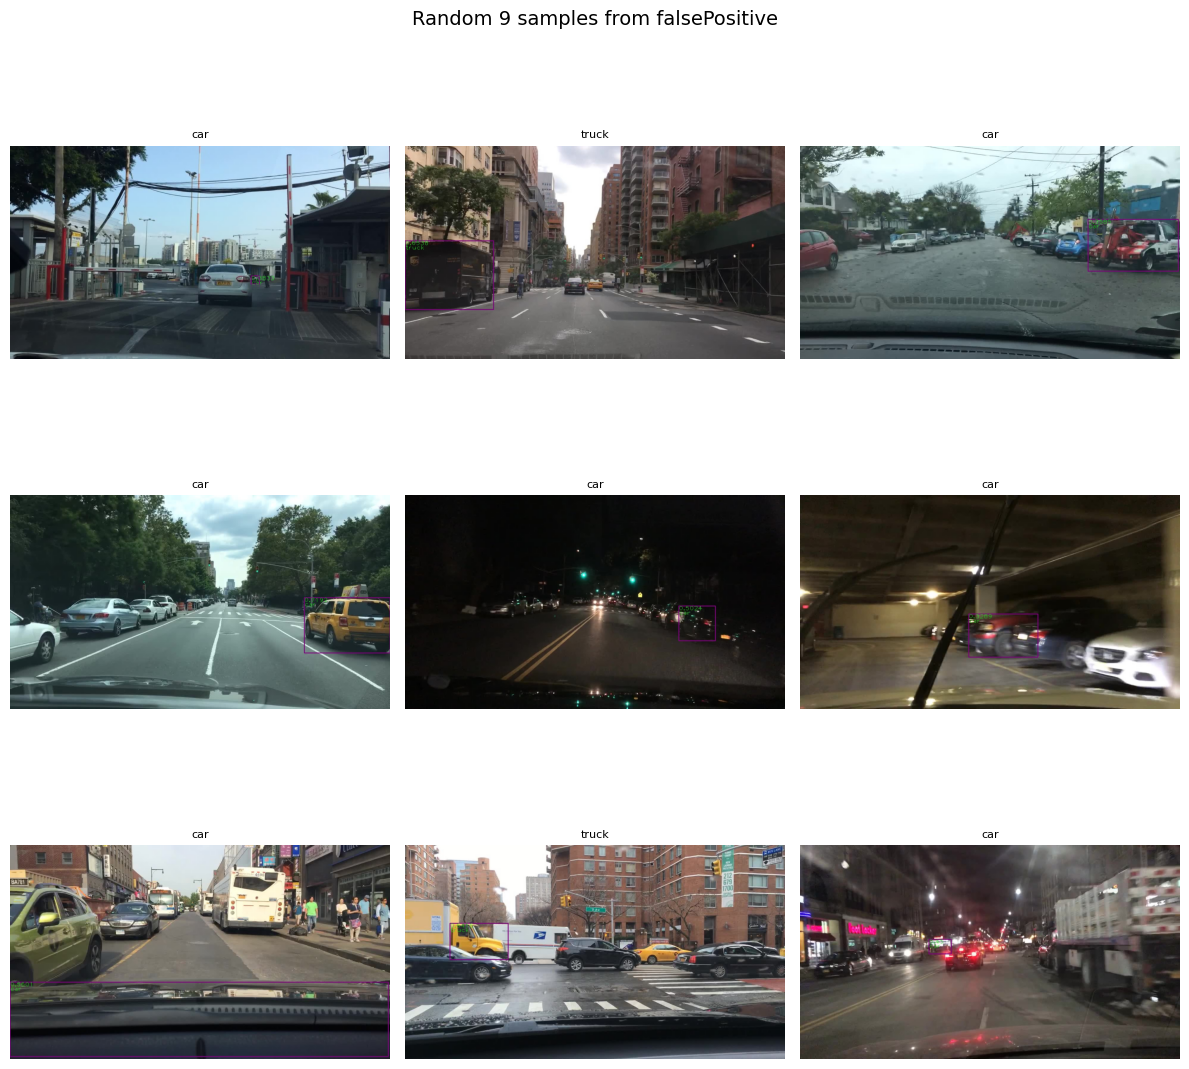

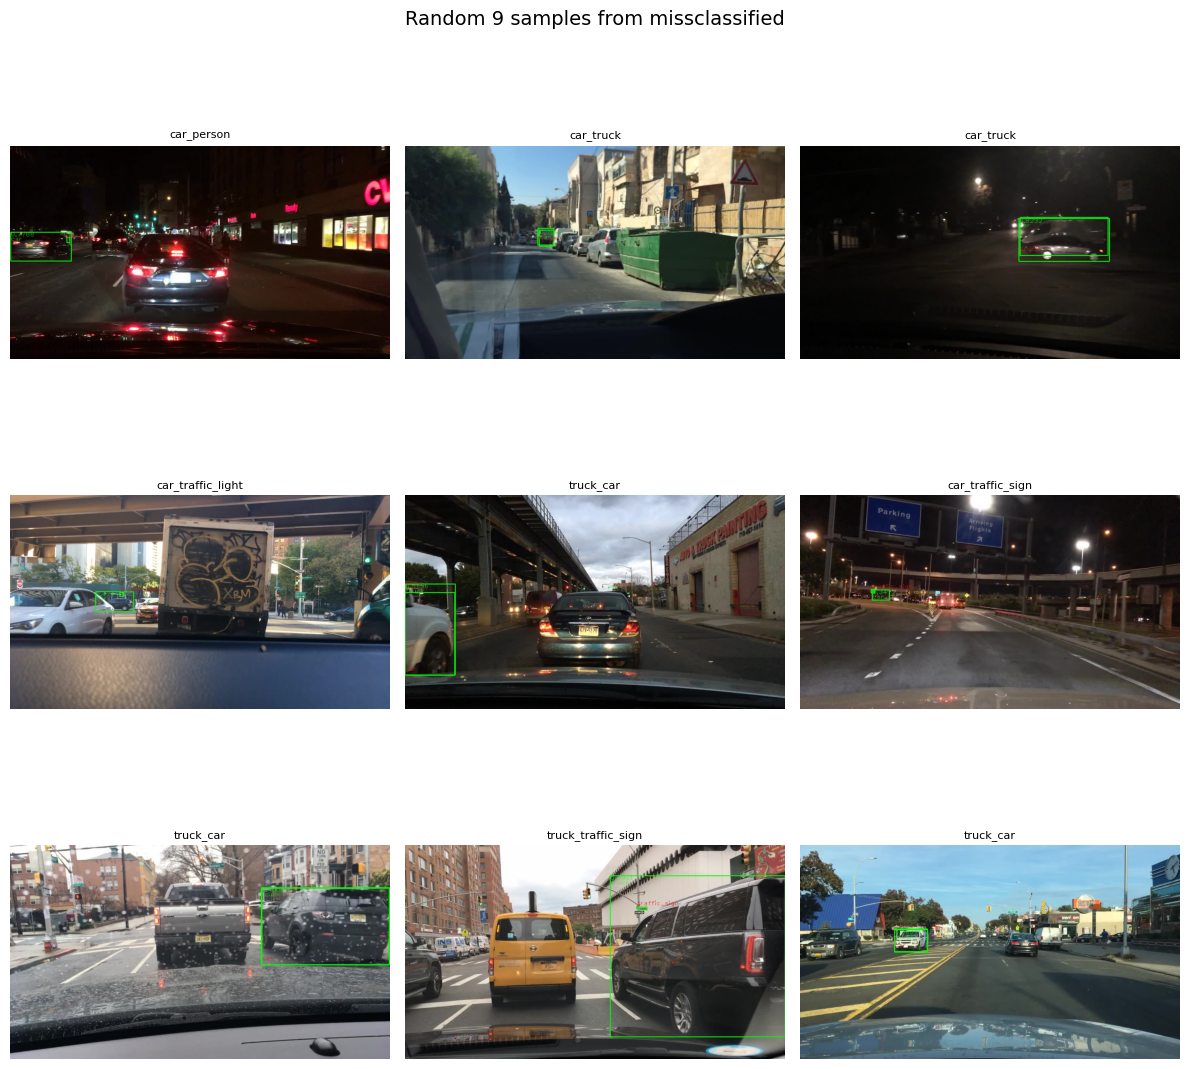

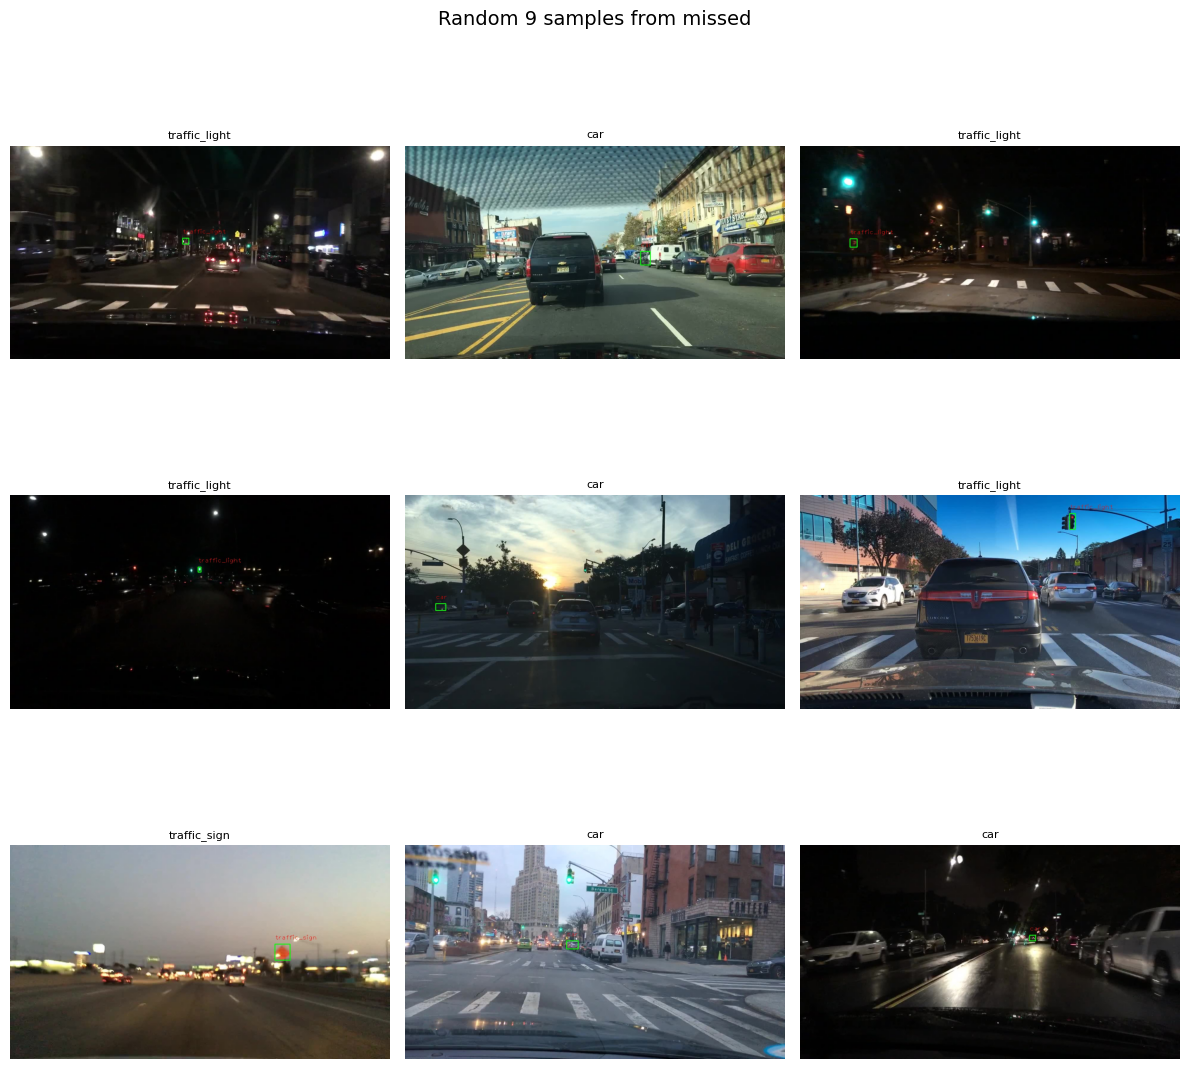

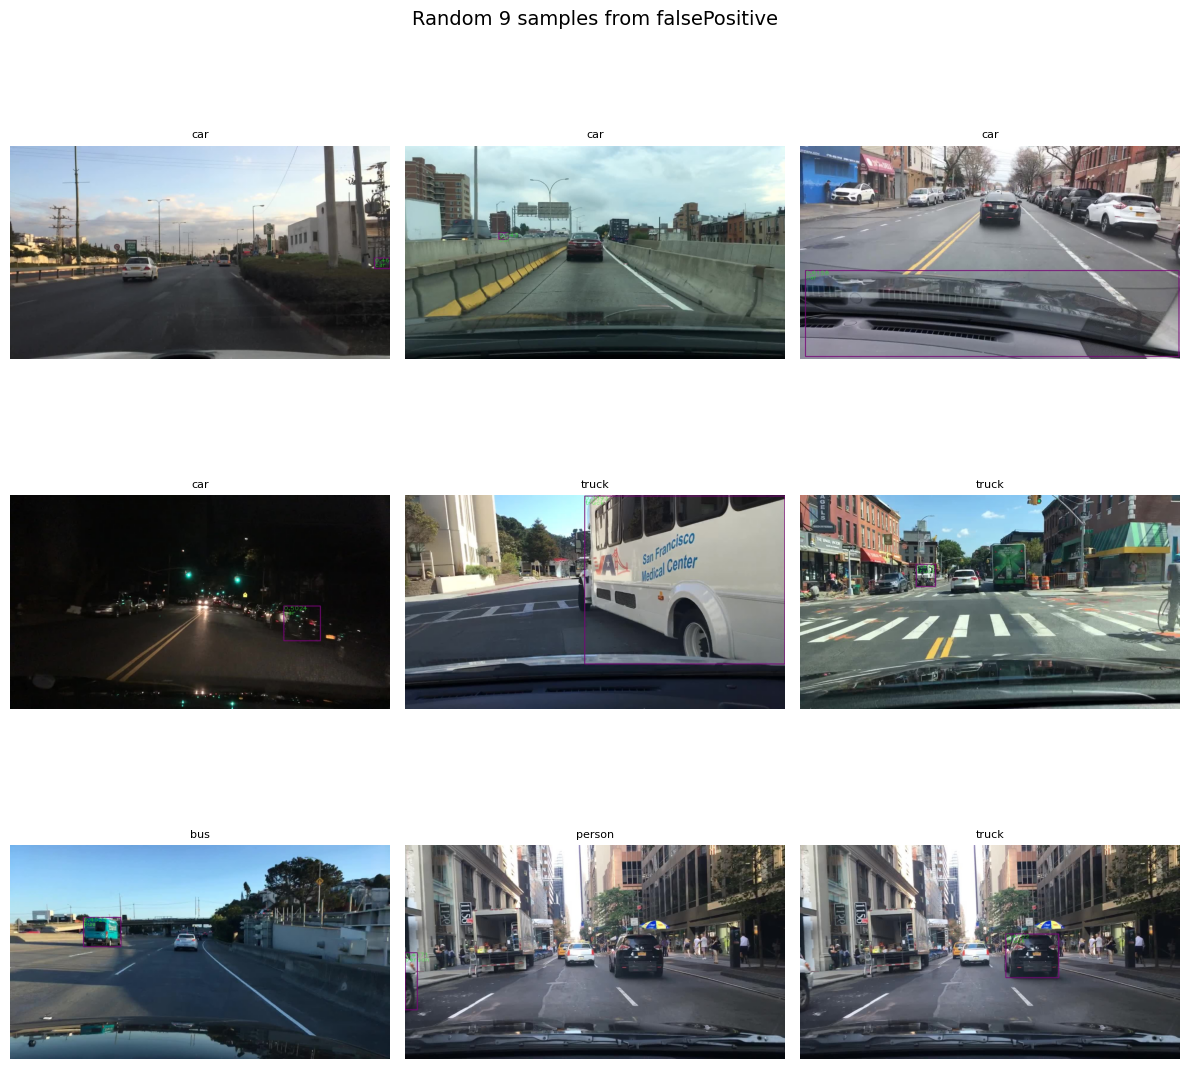

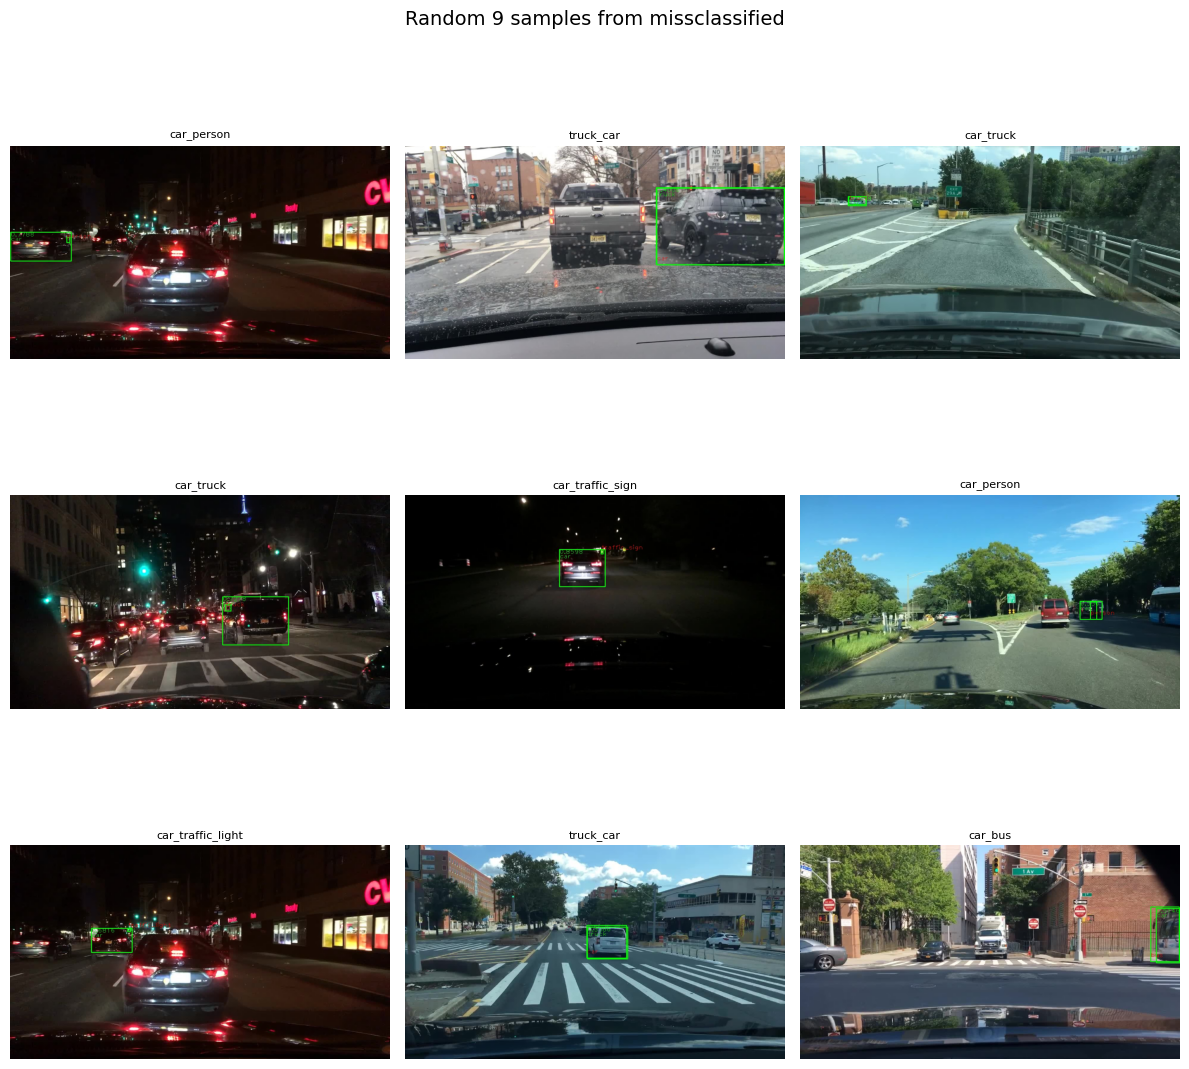

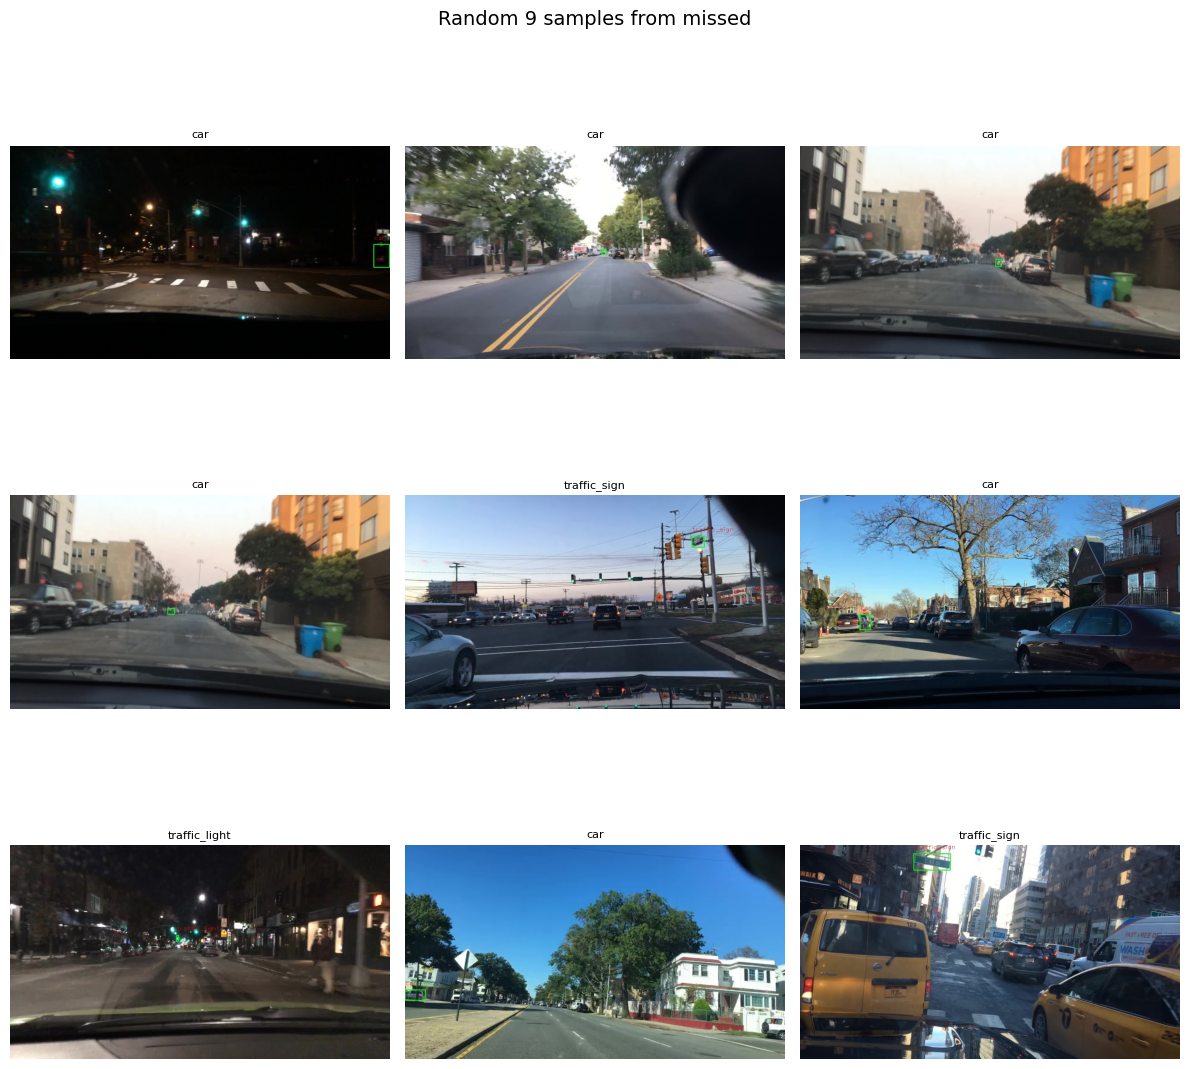

In [13]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display

# Make sure plots render inside Jupyter
%matplotlib inline  

# Base directory
base_dir = r"C:\Users\abhinav.gadge\Documents\KN_Docs_Induction\python_inference_client\python_inference_client\bdd_data\results\badPred"

# Main folders you listed
main_folders = ["falsePositive", "missclassified", "missed"]

def get_all_images(folder_path):
    """Collect all image file paths from subfolders of a given folder."""
    image_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                image_files.append(os.path.join(root, file))
    return image_files

def show_random_grid(images, folder_name):
    """Show 9 random images in a 3x3 grid."""
    if len(images) < 9:
        print(f"⚠️ Not enough images in {folder_name}, found only {len(images)}")
        return
    
    selected_images = random.sample(images, 9)
    
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    for ax, img_path in zip(axes.ravel(), selected_images):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(os.path.basename(os.path.dirname(img_path)), fontsize=8)
        ax.axis("off")
    
    plt.suptitle(f"Random 9 samples from {folder_name}", fontsize=14)
    plt.tight_layout()
    display(fig)   # ✅ forces inline rendering
    plt.close(fig) # ✅ prevents duplicate text output

# Loop through each main folder and show grid
for folder in main_folders:
    folder_path = os.path.join(base_dir, folder)
    images = get_all_images(folder_path)
    show_random_grid(images, folder)
